<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Multi_variable_Fish_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Used :- Fish market by Kaggle
# Basic understanding of dataset 
*   Length1:                  Vertical length in cm
*   Length2:                  Diagonal length in cm
*   Length3:                  Cross length in cm
*   Height:                   Height in cm
*   Width:                    Diagonal width in cm
*   Species:                  Species name of fish
*   Weight:                   Weight of fish in gram

Here i am using multiple independent varible to predict, Species column will not contribute in prediction.
  


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [16]:
dataset = pd.read_csv("Fish.csv")
print(dataset)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [17]:
dataset.shape

(159, 7)

In [18]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [19]:
Length1 = dataset.iloc[0:dataset.shape[0],2:3]
Length2 = dataset.iloc[0:dataset.shape[0],3:4]
Length3 = dataset.iloc[0:dataset.shape[0],4:5]
Height = dataset.iloc[0:dataset.shape[0],5:6]
width = dataset.iloc[0:dataset.shape[0],6:7]
weight = dataset.iloc[0:dataset.shape[0],1:2]
weight

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


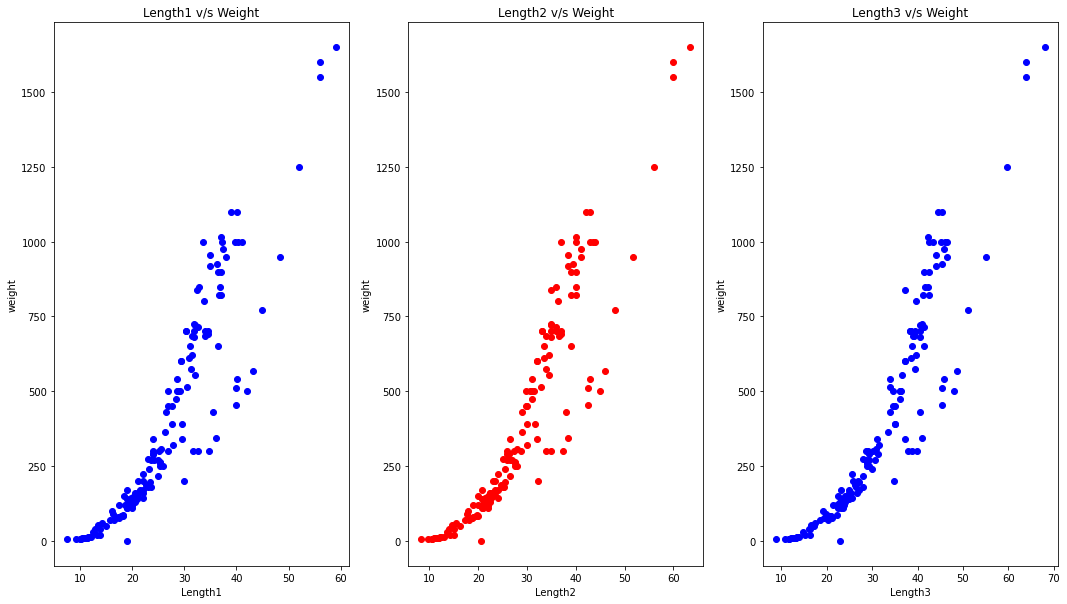

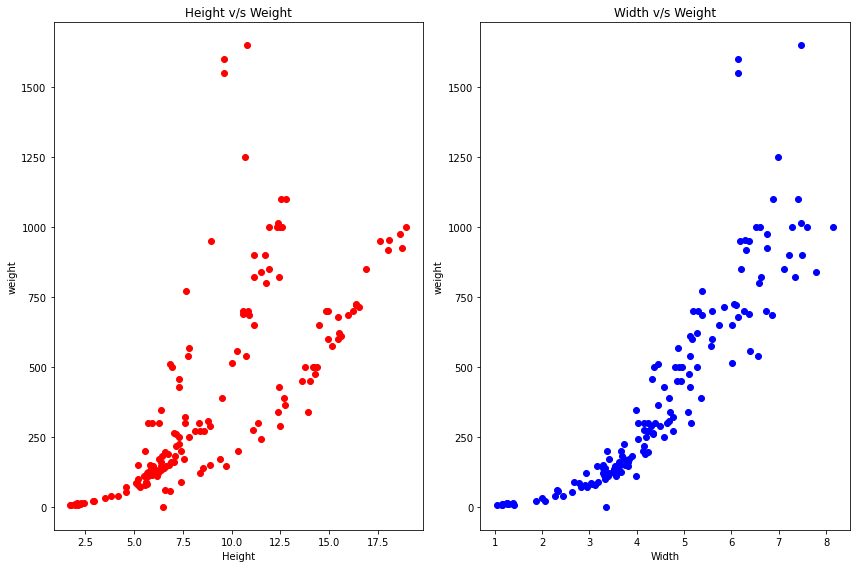

In [20]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(18,10),nrows=1,ncols=3)
fig,axes2=plt.subplots(figsize=(12,8),nrows=1,ncols=2)
axes[0].scatter(Length1,weight,color='b')
axes[0].set_xlabel("Length1")
axes[0].set_ylabel("weight")
axes[0].set_title("Length1 v/s Weight")

axes[1].scatter(Length2,weight,color='r')
axes[1].set_xlabel("Length2")
axes[1].set_ylabel("weight")
axes[1].set_title("Length2 v/s Weight")

axes[2].scatter(Length3,weight,color='b')
axes[2].set_xlabel("Length3")
axes[2].set_ylabel("weight")
axes[2].set_title("Length3 v/s Weight")

axes2[0].scatter(Height,weight,color='r')
axes2[0].set_xlabel("Height")
axes2[0].set_ylabel("weight")
axes2[0].set_title("Height v/s Weight")

axes2[1].scatter(width,weight,color='b')
axes2[1].set_xlabel("Width")
axes2[1].set_ylabel("weight")
axes2[1].set_title("Width v/s Weight")


plt.tight_layout()

In [21]:
type(dataset)

pandas.core.frame.DataFrame

In [22]:
#feature Normalization
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std
    

In [23]:
data = dataset.values       #dataFrames to array
n = len(data[:,-1])
X=dataset
X_norm,mean,std = feature_normalization(X)


In [24]:
Y=data[:,-1].reshape(n,1)

In [25]:
theta_array = np.zeros((6,1))

In [26]:
#defining the Hypothesis    : H(x) = theta0 + theta1*Length1 + theta2*Length2+.......

def hypothesis(theta_array,x1,x2,x3,x4,x5):      #theta_array = [theta_array[0],theta_array[1],theta_array[2],....]
    return theta_array[0]+(theta_array[1]*x1)+(theta_array[2]*x2)+(theta_array[3]*x3)+(theta_array[4]*x4)+(theta_array[5]*x5)


In [27]:
def cost_function(theta_array,x1,x2,x3,x4,x5,y,m):   #x and y are list of observation.
    total_error = 0     #accumulate all the error
    for i in range(m):
        total_error+=(theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i] +theta_array[5]*x5[i]- y[i])**2

    return total_error/(2*m)

In [28]:
def gradient_descent(theta_array,x1,x2,x3,x4,x5,y,alpha,m):
    summation_theta0 = 0
    summation_theta1 = 0
    summation_theta2 = 0
    summation_theta3 = 0
    summation_theta4 = 0
    summation_theta5 = 0

    for i in range(m):
        summation_theta0+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x1[i])
        summation_theta2+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x2[i])
        summation_theta3+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x3[i])
        summation_theta4+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x4[i])
        summation_theta5+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x5[i])

    new_theta0 = theta_array[0]-alpha*(summation_theta0/m)
    new_theta1 = theta_array[1]-alpha*(summation_theta1/m)
    new_theta3 = theta_array[3]-alpha*(summation_theta3/m)
    new_theta2 = theta_array[2]-alpha*(summation_theta2/m)
    new_theta4 = theta_array[4]-alpha*(summation_theta4/m)
    new_theta5 = theta_array[5]-alpha*(summation_theta5/m)

    updated_theta_array = [new_theta0,new_theta1,new_theta2,new_theta3,new_theta4,new_theta5]
    print(updated_theta_array)
    return updated_theta_array

In [29]:
def training(x1,x2,x3,x4,x5,y,alpha,iters):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    theta_3 = 0
    theta_4 = 0
    theta_5 = 0
    theta_array = [theta_0,theta_1,theta_2,theta_3,theta_4,theta_5]

    m=x1.size                #size of the data set or the number of observation
    cost_function_values = []
    for i in range(iters):
        theta_array = gradient_descent(theta_array,x1,x2,x3,x4,x5,y,alpha,m)     #taking the new theta's
        cost_function_values.append(cost_function(theta_array,x1,x2,x3,x4,x5,y,m))   #taking all the cost function values and storing
        if(i%5==0):
            y_new=x5*theta_array[5]+x4*theta_array[4]+x3*theta_array[3]+x2*theta_array[2]+x1*theta_array[1]+theta_array[0]       #linear regression line
            plt.plot(x1,y_new,'r')
            plt.scatter(x1,y)
            plt.show()

    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()

    return theta_array

[array([4.417485534591194e-05], dtype=object), array([0.0013046615232704395], dtype=object), array([0.0014120796264150935], dtype=object), array([0.0015503179245283016], dtype=object), array([0.0004532232736031448], dtype=object), array([0.00022338239333333332], dtype=object)]


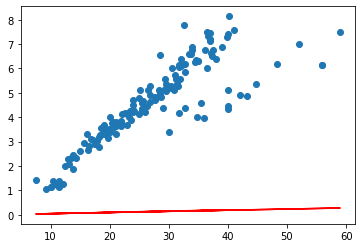

[array([8.760557957879429e-05], dtype=object), array([0.0025869937244422554], dtype=object), array([0.002800014640095364], dtype=object), array([0.00307417059046941], dtype=object), array([0.0008990107815720553], dtype=object), array([0.000443066724687183], dtype=object)]
[array([0.0001303049018213866], dtype=object), array([0.0038473785699284493], dtype=object), array([0.004164218059882186], dtype=object), array([0.00457201071370535], dtype=object), array([0.0013374897203473277], dtype=object), array([0.0006591162532565462], dtype=object)]
[array([0.00017228533345147303], dtype=object), array([0.005086191492207105], dtype=object), array([0.005505095839497759], dtype=object), array([0.006044283265939577], dtype=object), array([0.0017687851105414338], dtype=object), array([0.0008715931561217403], dtype=object)]
[array([0.0002135591718266377], dtype=object), array([0.006303801501591178], dtype=object), array([0.00682304698840136], dtype=object), array([0.007491425607169255], dtype=object

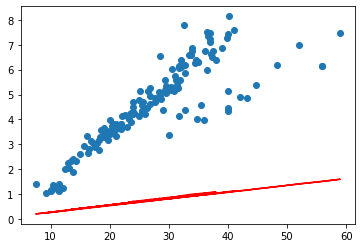

[array([0.0002940352100451476], dtype=object), array([0.00867685736936963], dtype=object), array([0.009391731421296389], dtype=object), array([0.010312031817081999], dtype=object), array([0.003020788335509803], dtype=object), array([0.001488194036088937], dtype=object)]
[array([0.000333260967139956], dtype=object), array([0.009833010116920914], dtype=object), array([0.010643229061866375], dtype=object), array([0.01168633350798521], dtype=object), array([0.003424557510340666], dtype=object), array([0.0016869812059099026], dtype=object)]
[array([0.000371827252495985], dtype=object), array([0.010969373940338992], dtype=object), array([0.01187332901243767], dtype=object), array([0.01303718088175174], dtype=object), array([0.0038217368828678466], dtype=object), array([0.0018824910406132138], dtype=object)]
[array([0.00040974534704884923], dtype=object), array([0.01208628734987317], dtype=object), array([0.013082397302865789], dtype=object), array([0.01436497514896156], dtype=object), array(

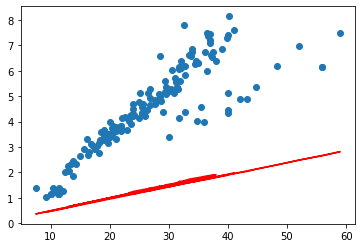

[array([0.0004836811259275333], dtype=object), array([0.014263088114481862], dtype=object), array([0.015438871823203852], dtype=object), array([0.01695297500779932], dtype=object), array([0.0049748538317194455], dtype=object), array([0.002449912377628021], dtype=object)]
[array([0.00051972042041108], dtype=object), array([0.015323623931716737], dtype=object), array([0.016586979232801415], dtype=object), array([0.01821394917255017], dtype=object), array([0.0053467821300759106], dtype=object), array([0.0026328639857952224], dtype=object)]
[array([0.0005551547508404637], dtype=object), array([0.016366006452441736], dtype=object), array([0.017715457550378844], dtype=object), array([0.019453407605801602], dtype=object), array([0.005712665297086007], dtype=object), array([0.0028128091425749777], dtype=object)]
[array([0.0005899944657403552], dtype=object), array([0.01739054620778529], dtype=object), array([0.018824642552073806], dtype=object), array([0.02067171835659908], dtype=object), arra

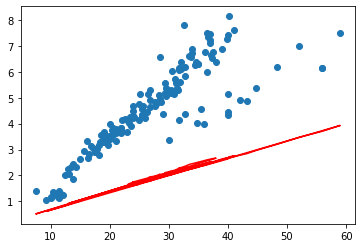

[array([0.0006579305609668171], dtype=object), array([0.019387313077910043], dtype=object), array([0.020986447091610946], dtype=object), array([0.0230463376353924], dtype=object), array([0.006775069277640368], dtype=object), array([0.003335115805675421], dtype=object)]
[array([0.0006910467652918584], dtype=object), array([0.020360135057061864], dtype=object), array([0.022039709854052902], dtype=object), array([0.02420335121110727], dtype=object), array([0.007117788462859696], dtype=object), array([0.003503540719240147], dtype=object)]
[array([0.0007236080079861405], dtype=object), array([0.021316304176670214], dtype=object), array([0.02307496594130597], dtype=object), array([0.02534062740970559], dtype=object), array([0.00745496216862605], dtype=object), array([0.00366920767560804], dtype=object)]
[array([0.0007556237822305945], dtype=object), array([0.022256105301320207], dtype=object), array([0.024092523376371355], dtype=object), array([0.026458503859621486], dtype=object), array([0.

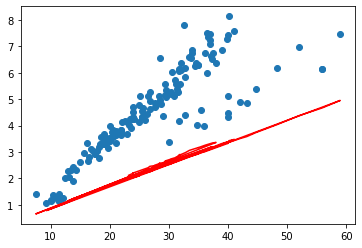

[array([0.000818056088917672], dtype=object), array([0.02408771874290868], dtype=object), array([0.02607574812679892], dtype=object), array([0.028637379248501096], dtype=object), array([0.008434150934660002], dtype=object), array([0.004150128557410798], dtype=object)]
[array([0.000848490806832162], dtype=object), array([0.024980076756483085], dtype=object), array([0.02704200550187484], dtype=object), array([0.02969902496038893], dtype=object), array([0.008750075245131024], dtype=object), array([0.004305227460734122], dtype=object)]
[array([0.0008784164326545433], dtype=object), array([0.025857158330830018], dtype=object), array([0.027991744519856896], dtype=object), array([0.03074256466199297], dtype=object), array([0.00906091242997026], dtype=object), array([0.004457796362089673], dtype=object)]
[array([0.0009078416749193225], dtype=object), array([0.026719224785425766], dtype=object), array([0.028925247744508942], dtype=object), array([0.031768308075511745], dtype=object), array([0.0

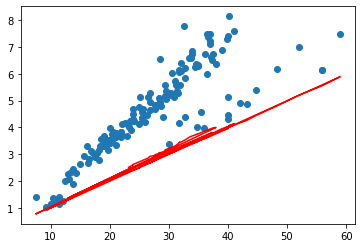

[array([0.0009652251006194189], dtype=object), array([0.028399335339020778], dtype=object), array([0.03074465298381803], dtype=object), array([0.03376761852710707], dtype=object), array([0.009963764018251687], dtype=object), array([0.004900752148480726], dtype=object)]
[array([0.0009931999664302667], dtype=object), array([0.02921788003081593], dtype=object), array([0.03163109628757674], dtype=object), array([0.034741778879939615], dtype=object), array([0.010255108146654252], dtype=object), array([0.005043626484931937], dtype=object)]
[array([0.0010207078184010737], dtype=object), array([0.030022410937482858], dtype=object), array([0.03250238653735562], dtype=object), array([0.03569932975083426], dtype=object), array([0.010541785618612022], dtype=object), array([0.005184179933303825], dtype=object)]
[array([0.0010477566452738443], dtype=object), array([0.03081316777947912], dtype=object), array([0.033358782941981066], dtype=object), array([0.036640555262307244], dtype=object), array([0.

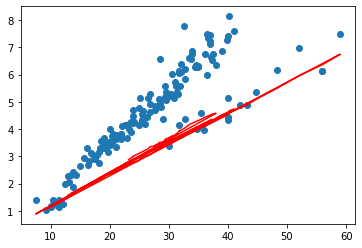

[array([0.0011005084977520024], dtype=object), array([0.03235429771809059], dtype=object), array([0.03502790895673593], dtype=object), array([0.038475142479128505], dtype=object), array([0.011374609570796805], dtype=object), array([0.005592308577861721], dtype=object)]
[array([0.0011262268268730415], dtype=object), array([0.03310513003166041], dtype=object), array([0.035841135116425935], dtype=object), array([0.03936904845957944], dtype=object), array([0.011643405157290749], dtype=object), array([0.0057239687524524], dtype=object)]
[array([0.001151516742483348], dtype=object), array([0.033843106851182], dtype=object), array([0.03664046067791116], dtype=object), array([0.040247717792849864], dtype=object), array([0.01190791980319747], dtype=object), array([0.005853499868817902], dtype=object)]
[array([0.0011763855730259289], dtype=object), array([0.034568448083332766], dtype=object), array([0.03742612342545227], dtype=object), array([0.04111141111768192], dtype=object), array([0.0121682

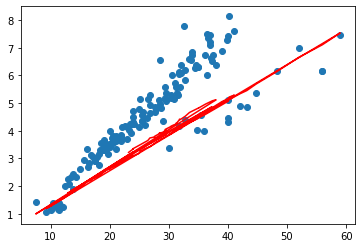

[array([0.0012248886680209618], dtype=object), array([0.035982084667911474], dtype=object), array([0.03895739134758232], dtype=object), array([0.04279489008077561], dtype=object), array([0.012676504154047667], dtype=object), array([0.006229679961681976], dtype=object)]
[array([0.0012485369710970421], dtype=object), array([0.03667080128131867], dtype=object), array([0.03970345203007888], dtype=object), array([0.043615175007794826], dtype=object), array([0.012924614916238876], dtype=object), array([0.006351052865722101], dtype=object)]
[array([0.0012717922705320843], dtype=object), array([0.03734772495472692], dtype=object), array([0.04043676105005557], dtype=object), array([0.04442148265253382], dtype=object), array([0.013168798572861896], dtype=object), array([0.006470472685946086], dtype=object)]
[array([0.0012946612890462456], dtype=object), array([0.0380130574187155], dtype=object), array([0.04115753653802673], dtype=object), array([0.04521405211098119], dtype=object), array([0.0134

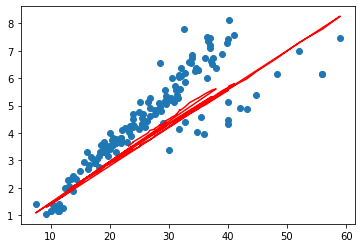

[array([0.0013392668011639472], dtype=object), array([0.03930973844571799], dtype=object), array([0.04256234084708566], dtype=object), array([0.04675891247298446], dtype=object), array([0.013878452954714376], dtype=object), array([0.0068173448911615035], dtype=object)]
[array([0.0013610161730470845], dtype=object), array([0.039941473450937175], dtype=object), array([0.043246787526672124], dtype=object), array([0.04751166139724024], dtype=object), array([0.01410758856707334], dtype=object), array([0.006929280804974968], dtype=object)]
[array([0.0013824050244025205], dtype=object), array([0.04056239024619474], dtype=object), array([0.04391953651565082], dtype=object), array([0.04825158831296125], dtype=object), array([0.014333121663113528], dtype=object), array([0.0070394250644472516], dtype=object)]
[array([0.001403439522292792], dtype=object), array([0.0411726738882934], dtype=object), array([0.0445807879152444], dtype=object), array([0.048978912553970626], dtype=object), array([0.0145

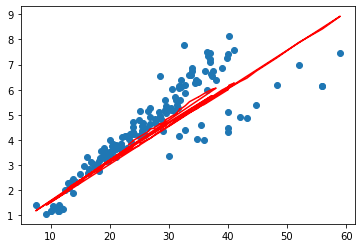

[array([0.001444469600262305], dtype=object), array([0.04236206616642497], dtype=object), array([0.04586958129501639], dtype=object), array([0.050396611651655654], dtype=object), array([0.01498871684760524], dtype=object), array([0.007359411785434404], dtype=object)]
[array([0.0014644769941838272], dtype=object), array([0.0429415293037893], dtype=object), array([0.0464975065961471], dtype=object), array([0.05108740667193071], dtype=object), array([0.015200445673700462], dtype=object), array([0.007462690710539639], dtype=object)]
[array([0.0014841536658418378], dtype=object), array([0.04351106839619596], dtype=object), array([0.0471147010639155], dtype=object), array([0.051766439469779574], dtype=object), array([0.015408869744227442], dtype=object), array([0.007564326068037032], dtype=object)]
[array([0.0015035052725684045], dtype=object), array([0.04407085320482024], dtype=object), array([0.04772134826044001], dtype=object), array([0.052433911250275765], dtype=object), array([0.0156140

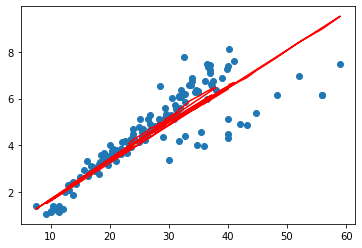

[array([0.0015412554383380027], dtype=object), array([0.045161824545385705], dtype=object), array([0.048903719441834394], dtype=object), array([0.05373495942926425], dtype=object), array([0.01601487391575123], dtype=object), array([0.00785964948763734], dtype=object)]
[array([0.001559664834765669], dtype=object), array([0.04569333627781551], dtype=object), array([0.04947979506476577], dtype=object), array([0.05436892126328445], dtype=object), array([0.01621063468811657], dtype=object), array([0.007954986955549845], dtype=object)]
[array([0.0015777708442575524], dtype=object), array([0.04621574422425542], dtype=object), array([0.050046026797262215], dtype=object), array([0.0549920930657556], dtype=object), array([0.01640336385463973], dtype=object), array([0.008048816702673042], dtype=object)]
[array([0.0015955786565463553], dtype=object), array([0.046729204114493356], dtype=object), array([0.050602583029355885], dtype=object), array([0.05560465941140964], dtype=object), array([0.016593

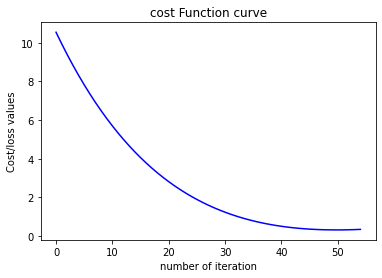

In [30]:
alpha = 0.00001
iters = 55
theta_array = training(data[:,2:3],data[:,3:4],data[:,4:5],data[:,5:6],data[:,6:7],Y,alpha,iters)

In [31]:
theta_array

[array([0.0015955786565463553], dtype=object),
 array([0.046729204114493356], dtype=object),
 array([0.050602583029355885], dtype=object),
 array([0.05560465941140964], dtype=object),
 array([0.01659311327400264], dtype=object),
 array([0.008141164520125428], dtype=object)]

In [32]:
hypothesis(theta_array,46.0,24.0,45.0,78.0,15.0)


array([7.284190937315303], dtype=object)

In [34]:
cost_function(theta_array,data[:,2:3],data[:,3:4],data[:,4:5],data[:,5:6],data[:,6:7],Y,len(data))
#12.074006287438554 with iters=50 alpha = 0.001
#6.274349697436416  with iters=50 alpha=0.0001
#0.3435235136242153 with iters = 55 alpha =0.00001
#0.3168217405210782 with iters= 50  alpha = 0.00001
#0.4366048829408491 with iters=60   alpha = 0.00001
#0.3435235136242153 with iters = 55 alpha = 0.00001
#3.0784371382661186  with iters=60 and alpha = 0.00002

array([0.3435235136242153], dtype=object)